Import necessary libraries.

In [21]:
import shutil
import requests
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

Load the WPI dataset.

In [2]:
df = pd.read_json('wpi_annotations.json')

Structure of the dataset

In [3]:
df.head(2)

,Genres,img_urls,Title,img_path,Names,Topics,Places
0,"[notes (documents), newspapers]",https://media.wpi.navigating.art/5ae7feb5-fa43...,460899-bulletin-de-la-vie-artistique,json_files_200/bulletin-de-la-vie-artistique/4...,NaN,NaN,NaN
1,NaN,https://media.wpi.navigating.art/38192df0-99fd...,945-apolline-ferdinande-verboeckhoven,json_files_200/apolline-ferdinande-verboeckhov...,[Apolline-Ferdinande Verboeckhoven (agent as s...,[women (female humans)],NaN


Download the images.

In [ ]:
session = requests.Session()
headers = {
    'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org) generic-library/0.0'
}

imgs_path = Path('imgs')
imgs_path.mkdir(parents=True, exist_ok=True)

for index, row in df.iterrows():
    url = row['img_urls']
    file_name = imgs_path / f'{index}_{row["Title"]}.jpg'
    res = session.get(str(url), headers=headers, stream=True)
    if res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(res.raw, f)
    else:
        print(f'Error: {res.status_code} - {res.text}')

In [25]:
count = len(df.index)
print(f'Number of entries in dataset: {count}')

Number of entries in dataset: 19130


In [29]:
count_w_topics = len(df[df['Topics'].notnull()|df['Genres'].notnull()])
print(f'Number of entries with labels: {count_w_topics}')
print(f'{round(count_w_topics / count * 100)}% have some kind of labels (either topic or genre).')

Number of entries with labels: 10433
55% have some kind of labels (either topic or genre).


In [41]:
COLORS = [
  '#797979',
  '#e0736e',
  '#aaaaaa',
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=COLORS)
plt.style.use('seaborn-v0_8-whitegrid')

plots_path = Path('plots')
plots_path.mkdir(parents=True, exist_ok=True)

Extract the genres.

In [34]:
genres = [i for g in df.Genres.tolist() if str(g) != 'nan' for i in g]

In [38]:
max_number = 15
occurence_count_most = Counter(genres).most_common(max_number)
genre, counts = zip(*occurence_count_most)

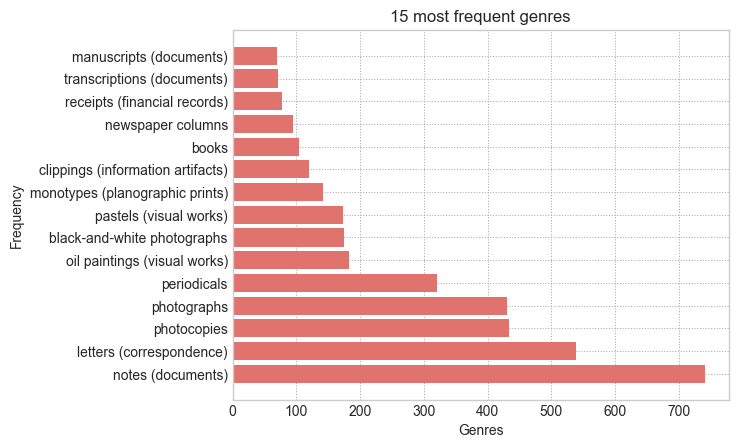

In [42]:
plt.barh(genre, counts, color=COLORS[1])
plt.title(f'{max_number} most frequent genres')
plt.ylabel('Frequency')
plt.xlabel('Genres')
plt.grid(color = COLORS[2], linestyle = 'dotted', linewidth = 0.75)
plt.savefig(plots_path / 'freq_genres.png', bbox_inches='tight', transparent=True, dpi=1200)
plt.show()

In [26]:
occurence_count = Counter(genres)
print(f'Number of different genres: {len(occurence_count)}')

Number of different genres: 193


Extract examples for 8 most common genres and save them into `wpi_examples.csv`.

In [49]:
for i in range(8):
    mask = df['Genres'][df['Genres'].notnull()].apply(lambda x:
                                                      any(
                                                          item for item in [occurence_count.most_common()[i][0]]
                                                          if item in x)
                                                      )
    if i == 0:
        df[df['Genres'].notnull()][mask].head(1).to_csv('wpi_examples.csv',
                                                index=False)
    else:
        df[df['Genres'].notnull()][mask].head(1).to_csv('wpi_examples.csv',
                                                        index=False,
                                                        header=False,
                                                        mode='a')

Extract topics.

In [17]:
topics_list = df.Topics.tolist()
topics_list = [x for x in topics_list if str(x) != 'nan']
topics = []
for g in topics_list:
    for i in g:
        topics.append(i)

In [27]:
topics_occurence_count_most = Counter(topics)
print(f'Number fo different topics: {len(topics_occurence_count_most)}')

Number fo different topics: 1414


In [48]:
topics_nr = 15
topics_occurence_count_most = Counter(topics).most_common(topics_nr)
topic, topics_counts = zip(*topics_occurence_count_most)

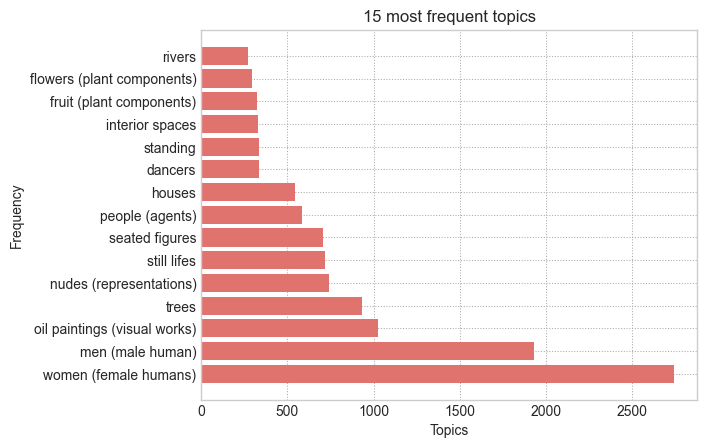

In [43]:
plt.barh(topic, topics_counts, color=COLORS[1])
plt.title(f'{topics_nr} most frequent topics')
plt.ylabel('Frequency')
plt.xlabel('Topics')
plt.grid(color = COLORS[2], linestyle = 'dotted', linewidth = 0.75)
plt.savefig(plots_path / 'freq_topics.png', bbox_inches='tight', transparent=True, dpi=1200)
plt.show()